In [51]:
import numpy as np
import scipy.linalg

1. Решите линейную систему

In [2]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]])
B = np.array([12, 2, 1])
np.linalg.solve(A, B)

array([-9.2       ,  0.9       ,  6.46666667])

2. Найдите псевдорешение:  
x + 2y – z = 1  
3x – 4y = 7  
8x – 5y + 2z = 12  
2x – 5z = 7  
11x + 4y – 7z = 15

In [16]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, -5, 0], [11, 4, -7]])
B = np.array([1, 7, 12, 7, 15])
np.linalg.lstsq(A, B, rcond=None)

(array([ 1.15601029, -0.889718  , -0.85029782]),
 array([0.66772534]),
 3,
 array([14.89650167, 10.4695886 ,  2.73531577]))

3. Сколько решений имеет линейная система.  
Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 

In [48]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
B = np.array([[12, 2, 1]]) # 0 solusions
B = np.array([[7, 8, 9]])
C = np.concatenate((A, B.T), axis=1)
print(C)
print(np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001))
np.linalg.solve(A, B[0])

[[1 2 3 7]
 [4 5 6 8]
 [7 8 9 9]]
2 2


array([-14.33333333,  22.66666667,  -8.        ])

4. Вычислите LU-разложение матрицы.  
После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [79]:
#A = np.array([[7,3,-1,2], [3,8,1,-4], [-1,1,4,-1],[2,-4,-1,6]])
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]])
B = np.array([10, 20, 30])

P, L, U = scipy.linalg.lu(A)

print(P)
print(L)
print(U)

#print(np.dot(P, A) - np.dot(L, U))
print(np.allclose(A - P @ L @ U, np.zeros((3, 3))))

print()
print(np.linalg.solve(A, B))

y = np.linalg.solve(L, B)
x = np.linalg.solve(U, y)
x

[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]
True

[10.13888889  0.34722222 -0.27777778]


array([22.40740741,  1.01851852, -1.48148148])

5. Найдите нормальное псевдорешение недоопределенной системы:  
x + 2y – z = 1  
8x – 5y + 2z = 12  
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум. 

In [80]:
def Q(x, y, z):
    return x**2 + y**2 + z**2

In [113]:
A = np.array([[1, 2, -1], [8, -5, 2]])
B = np.array([1, 12])
sol = np.linalg.lstsq(A, B, rcond=None)
sol

(array([ 1.38191882, -0.18081181,  0.0202952 ]),
 array([], dtype=float64),
 2,
 array([9.65316119, 2.41173777]))

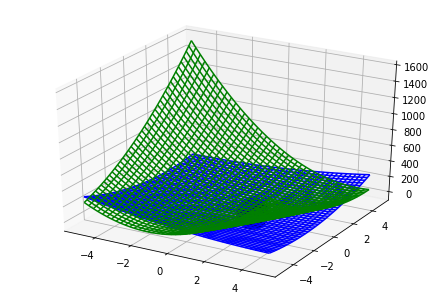

In [130]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D

fig = figure()
ax = Axes3D(fig)
X = np.linspace(-5, 5, 201)
Y = np.linspace(-5, 5, 201)
X, Y = np.meshgrid(X, Y)

ax.plot_wireframe(X, Y, Q(X, Y, X + 2*Y - 1), color='blue')
ax.plot_wireframe(X, Y, Q(X, Y, 6 - 4*X + 2.5*Y), color='green')
# ax.plot(X, Y, 1)
ax.scatter(1.38191882, -0.18081181,  0.0202952,'z',1000,'black');

6. Найдите одно из псевдорешений вырожденной системы.  
Попробуйте также отыскать и нормальное псевдорешение.